In [1]:
from PIL import Image, ImageFilter
import numpy as np

%matplotlib inline

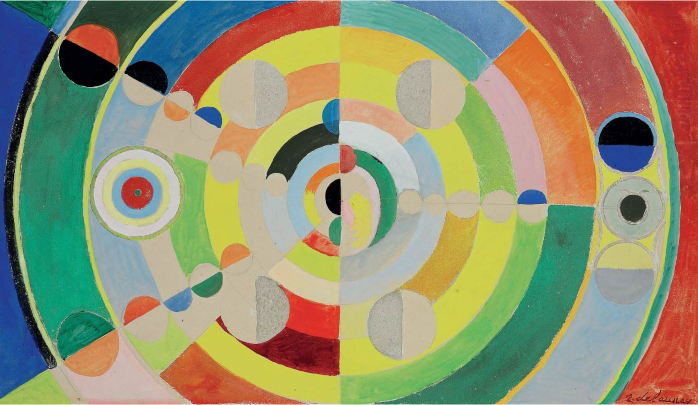

In [2]:
img = Image.open('abstract-art-hero.jpg')
img

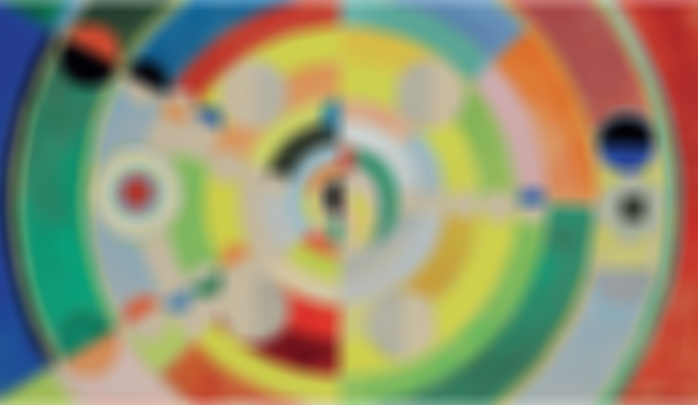

In [3]:
img.filter(ImageFilter.BoxBlur(10)) # близорукость)

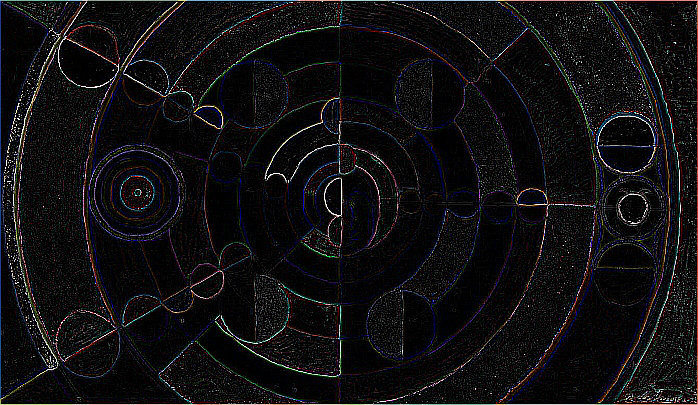

In [4]:
img.filter(ImageFilter.FIND_EDGES)

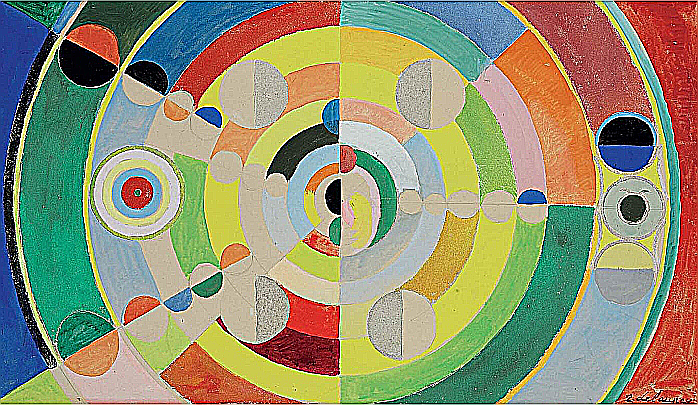

In [5]:
img.filter(ImageFilter.EDGE_ENHANCE_MORE)

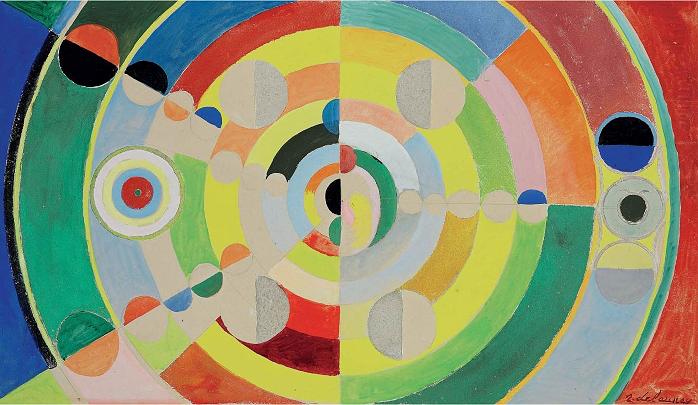

In [6]:
img.filter(ImageFilter.DETAIL)

# Нахождение кругов на изображении

In [7]:
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
from skimage.transform import hough_circle, hough_circle_peaks
from skimage import data, color

import cv2

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 200

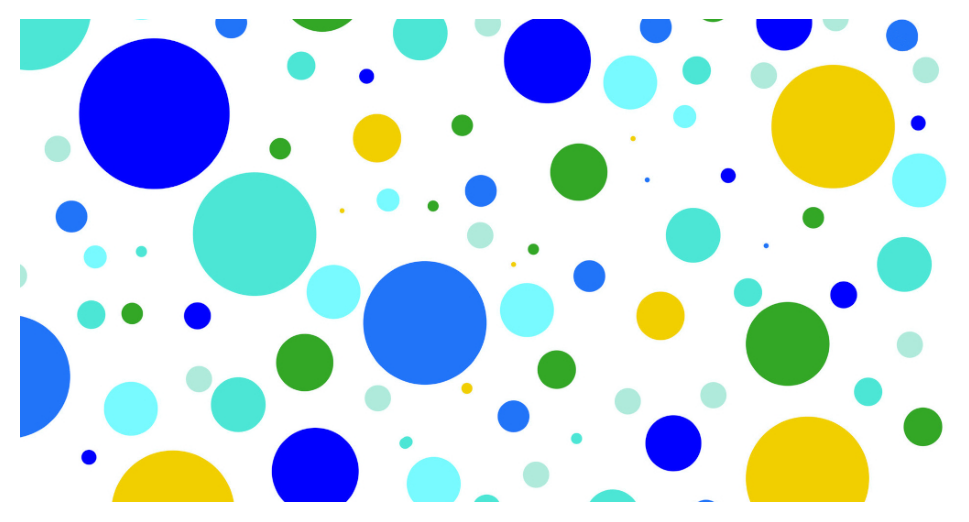

In [8]:
img = cv2.imread('cirlces.jpeg', cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(img)

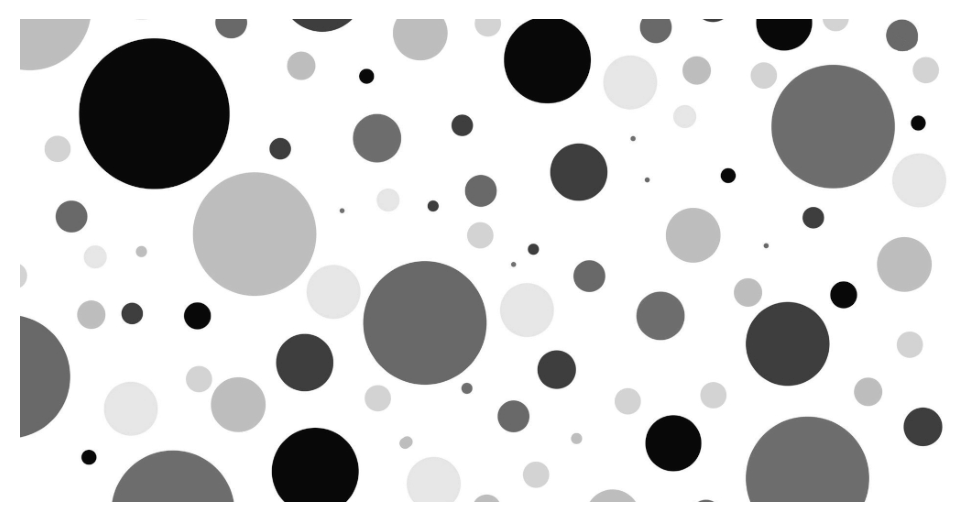

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(gray, cmap='gray')

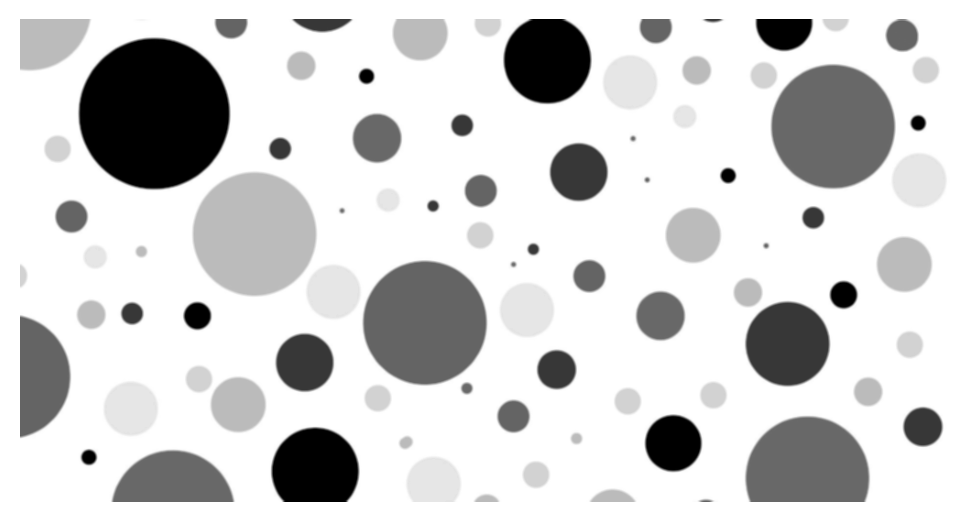

In [10]:
gray_blurred = cv2.blur(gray, (3, 3))
plt.axis('off')
plt.imshow(gray_blurred, cmap='gray')

In [17]:
detected_circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 20,
                                    minRadius=1, maxRadius=100, param1 = 50, param2 = 30)

if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        cv2.circle(img, (a, b), r, (0, 0, 0), 2)
        cv2.imshow('Detected circle', img)
        cv2.waitKey(40)

In [18]:
cv2.destroyWindow('Detected circle')